In [10]:
from functions import *

In [20]:
T = 1
n = 3

In [12]:
# NOTE: We evaluate the algorithm on the SAME 10 random instances for each grid point

In [22]:
gamma_lims = (0.2, 2)
gamma_steps = 200
time_lims = (0,10)
time_steps = 20

gamma_range = np.linspace(gamma_lims[0], gamma_lims[1], gamma_steps)
time_range = np.linspace(time_lims[0], time_lims[1], time_steps)

num_random_models = 10

delta_quantum_arr = np.zeros((time_steps, gamma_steps, num_random_models))
delta_mismatched_quantum_arr = np.zeros((time_steps, gamma_steps, num_random_models))

for t_id, t in enumerate(time_range):
    for gamma_id, gamma in enumerate(gamma_range):
        np.random.seed(0) # set the seed for reproducibility
        for i in range(num_random_models):
            m = RandomIsingModel(n)

            proposal_mat_quantum = get_proposal_mat_quantum(m, gamma, t)
            P_quantum = get_transition_matrix(m, T, proposal_mat_quantum)
            delta_quantum = get_delta(P_quantum)
            delta_quantum_arr[t_id, gamma_id, i] = delta_quantum

            m_mismatched = RandomIsingModel(n)
            proposal_mat_mismatched_quantum = get_proposal_mat_quantum(m_mismatched, gamma, t)
            P_mismatched_quantum = get_transition_matrix(m, T, proposal_mat_mismatched_quantum)
            delta_mismatched_quantum = get_delta(P_mismatched_quantum)
            delta_mismatched_quantum_arr[t_id, gamma_id, i] = delta_mismatched_quantum
    clear_output(wait=True)
    display(f'Finished {t_id+1} / {time_steps} time steps.')

'Finished 20 / 20 time steps.'

In [14]:
pickle.dump(delta_quantum_arr, open('delta_quantum_arr_n6.p','wb'))
# d = pickle.load(open('delta_quantum_arr_n3.p','rb'))
# d_mis = pickle.load(open('delta_mismatched_quantum_arr_n3.p','rb'))

In [15]:
pickle.dump(delta_mismatched_quantum_arr, open('delta_mismatched_quantum_arr_n6.p','wb'))

In [16]:
delta_quantum_arr_avg = np.mean(delta_quantum_arr, axis=2)
delta_quantum_arr_std = np.std(delta_quantum_arr, axis=2)

delta_mismatched_quantum_arr_avg = np.mean(delta_mismatched_quantum_arr, axis=2)
delta_mismatched_quantum_arr_std = np.std(delta_mismatched_quantum_arr, axis=2)

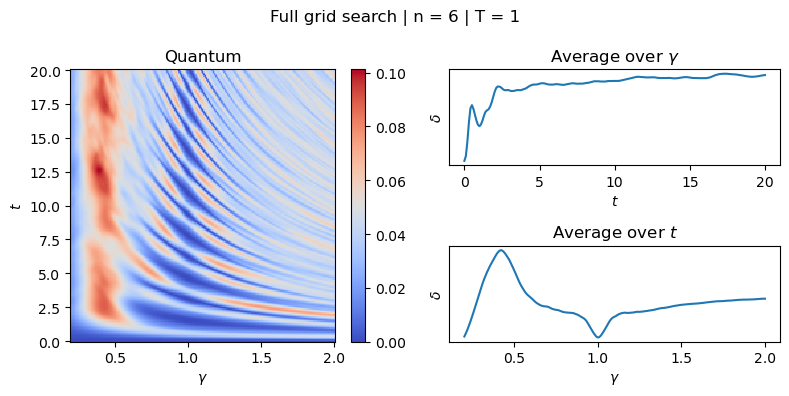

In [17]:
fig, axs = plt.subplot_mosaic([['left', 'upper right'],
                               ['left', 'lower right']],
                              figsize=(8, 4),
                              width_ratios=[2,2])
fig.suptitle(f'Full grid search | n = {n} | T = {T}')

pc0 = axs['left'].pcolor(gamma_range,
                         time_range, 
                         delta_quantum_arr_avg, 
                         cmap='coolwarm',
                         vmin=0,
                        #  vmax=0.14
                         )
fig.colorbar(pc0, ax=axs['left'])

axs['left'].set_xlabel('$\gamma$')
axs['left'].set_ylabel('$t$')
axs['left'].set_title('Quantum')

# axs['left'].set_yscale('log')
# axs['left'].set_xscale('log')

axs['upper right'].plot(time_range, np.mean(delta_quantum_arr_avg, axis=1))
axs['upper right'].set_xlabel('$t$')
axs['upper right'].set_ylabel('$\delta$')
axs['upper right'].set_yticks([])
axs['upper right'].set_title('Average over $\gamma$')

axs['lower right'].plot(gamma_range, np.mean(delta_quantum_arr_avg, axis=0))
axs['lower right'].set_xlabel('$\gamma$')
axs['lower right'].set_ylabel('$\delta$')
axs['lower right'].set_yticks([])
axs['lower right'].set_title('Average over $t$')

fig.tight_layout()

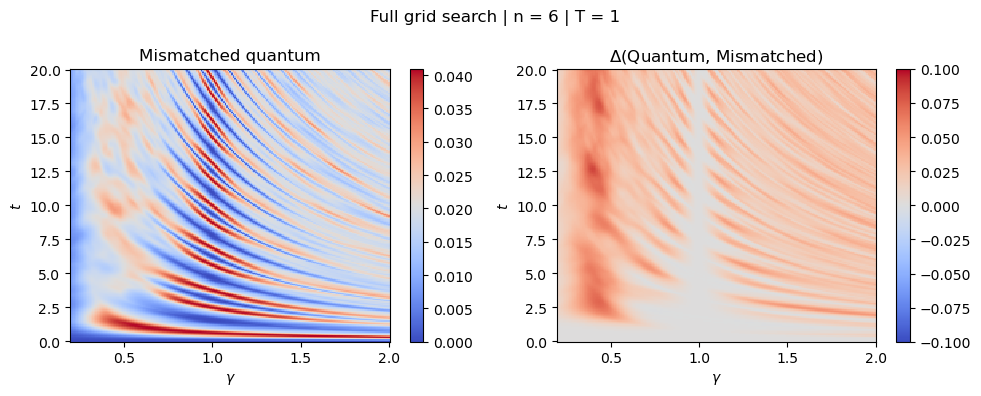

In [18]:
fig, axs = plt.subplots(1,2, figsize=(10, 4))
fig.suptitle(f'Full grid search | n = {n} | T = {T}')

pc0 = axs[0].pcolor(gamma_range, 
                    time_range, 
                    delta_mismatched_quantum_arr_avg, 
                    cmap='coolwarm',
                    vmin=0,
                    # vmax=0.14
                    )
fig.colorbar(pc0, ax=axs[0])

pc1 = axs[1].pcolor(gamma_range, 
                    time_range, 
                    delta_quantum_arr_avg - delta_mismatched_quantum_arr_avg, 
                    cmap='coolwarm',
                    vmin=-0.1,
                    vmax=0.1
                    )
fig.colorbar(pc1, ax=axs[1])

axs[0].set_ylabel('$t$')
axs[0].set_xlabel('$\gamma$')
axs[0].set_title('Mismatched quantum')

axs[1].set_ylabel('$t$')
axs[1].set_xlabel('$\gamma$')
axs[1].set_title('$\Delta$(Quantum, Mismatched)')

fig.tight_layout()